## Project 2 - Data Cleansing Practice on Zillow Data

* abundant missing data => impute missing values.
* data cleaning.

- merge data:
    * df=train.merge(properties,left_on='parcelid', right_on='parcelid')
- missing data:
    * index & rename:
        * missing=df.isna().sum().reset_index()
        * missing.columns=['column','count']
    * loc & sort:
        * missing= missing.loc[missing_df.count>0].sort_values(by='count')
        * set a threshold: 
            * threshold=0.97
            * missing_prop=(df.isnull().sum()/len(df)).reset_index()
            * missing_prop.columns=['field','prop']
            * missing_prop=missing_prop.sort_values(by='prop',ascending=False)
            * missing_cols=missing_prop[missing_prop.prop>=threshold].field.tolist()       
    * plot:
        * missing.plot(x="column",y="count",kind='barh',figsize=(14,14),logx=False)
    * replace values:
        * fill 0/'None'/"N/A":
            * one column:
                * df.loc[df.pooltype.isa(),'pooltype'] = 0/'None'/"N/A"
            * other columns:
                * df.loc[(df['poolcnt'] == 0), 'poolsizesum'] = 0
        * fill medium:
            * poolsize_median = df.loc[df.poolcnt > 0, 'poolsizesum'].median()
            * df.loc[(df.poolcnt>0 & df.poolsizesum.isna()),'poolsizesum']=poolsize_median
        * three values: Yes/No/0
            * df['fireplaceflag']= "No"
            * df.loc[df['fireplacecnt']>0,'fireplaceflag']= "Yes"
            * df.loc[df.fireplacecnt.isna(),'fireplacecnt'] = 0
- correlation matrix:
    * num_var: num_var=list(df_train.select_dtypes(include=np.number))
    * corr table: df[num_var].corr()
    * heatmap: 
        * plt.figure(figsize = (14,12))
        * sns.heatmap(df[num_var].corr())
    * deal with strong correlation:
        * set dropcols:
            * dropcols=[]; dropcols.append('XXX')
            * dropcols=dropcols+missing_cols
            * df=df.drop(['parcelid','transactiondate'])
            * df=df.drop(dropcols,axis=1, inplace=True)
        
        * Q: how to set threshold vs select manually
    
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [2]:
train=pd.read_csv('train_2016.csv')
properties=pd.read_csv('properties_2016.csv')

/Users/xrli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head(5)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [4]:
properties.head(5)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [5]:
df=train.merge(properties,left_on='parcelid', right_on='parcelid')

In [6]:
df=df.drop(columns=['parcelid','transactiondate'])

In [7]:
df.head(5) #58col

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.0276,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,-0.1684,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,-0.0040,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,0.0218,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,-0.0050,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [8]:
#df.dtypes

In [9]:
df.columns

Index(['logerror', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [10]:
df.shape

(90275, 58)

#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [11]:
#reset_index() 变成表格, -> data frame.
#missing_df=df_train.isna().sum()
missing=df.isna().sum().reset_index()
missing.columns=['column','m_count']
missing.head(5)

# can be done in one line
#missing_df = pd.DataFrame(df_train.isnull().sum().reset_index().values, columns=['column_name', 'missing_count'])

,column,m_count
0,logerror,0
1,airconditioningtypeid,61494
2,architecturalstyletypeid,90014
3,basementsqft,90232
4,bathroomcnt,0


In [12]:
#loc[xxx>0], sort_values(by="")
missing= missing.loc[missing.m_count>0].sort_values(by='m_count')
missing

,column,m_count
53,landtaxvaluedollarcnt,1
51,taxvaluedollarcnt,1
32,propertycountylandusecode,1
54,taxamount,6
39,regionidzip,35
50,structuretaxvaluedollarcnt,380
57,censustractandblock,605
11,calculatedfinishedsquarefeet,661
47,yearbuilt,756
8,calculatedbathnbr,1182


#### 3.(b) Draw a horizontal bar plot to visualize it.

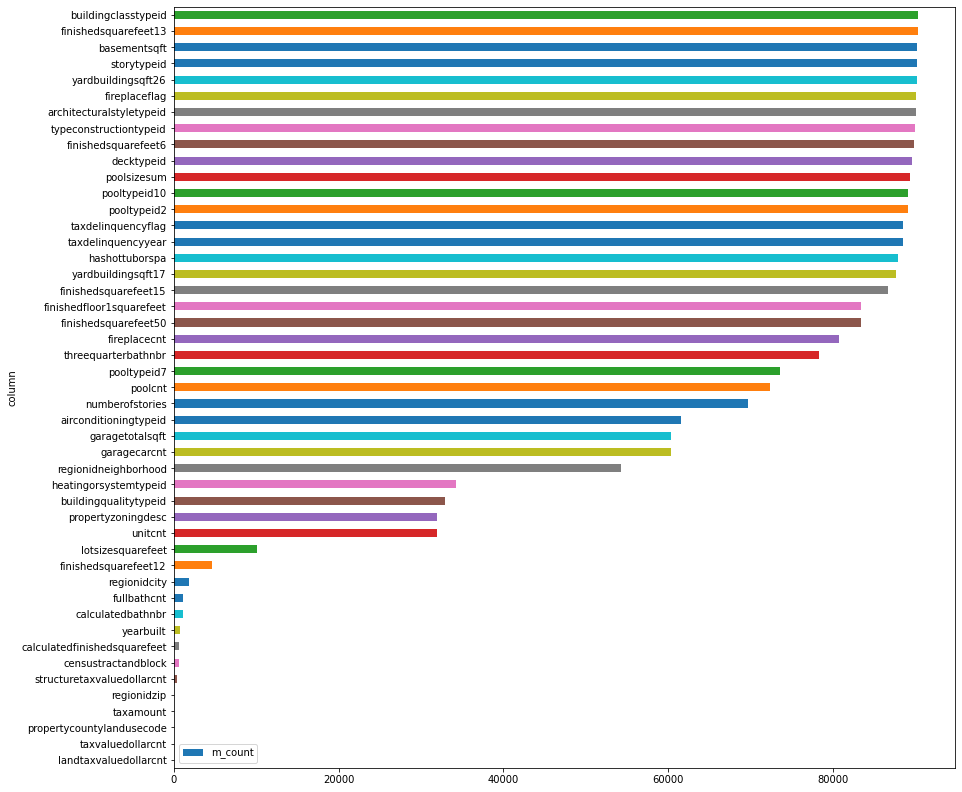

In [13]:
missing.plot(x="column",y="m_count",kind='barh',figsize=(14,14),logx=False)

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

In [14]:
# df.fips.describe()

In [15]:
obj_var=list(df.select_dtypes(include=np.object))
print(len(obj_var))
obj_var

5


['hashottuborspa',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'fireplaceflag',
 'taxdelinquencyflag']

In [16]:
num_var=list(df.select_dtypes(include=np.number))
print(len(num_var))
num_var

53


['logerror',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landt

In [17]:
df[num_var].corr()

,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
logerror,1.000000,0.005179,-0.004276,0.253395,0.027889,0.025467,NaN,-0.009573,0.029448,NaN,...,0.086179,0.017312,0.013075,0.022085,0.006508,NaN,-0.003051,-0.006671,-0.012996,0.008892
airconditioningtypeid,0.005179,1.000000,-0.154656,NaN,-0.037479,0.075327,NaN,0.008108,-0.034114,NaN,...,NaN,-0.074885,0.234819,-0.047324,-0.001102,NaN,0.027169,-0.028251,0.076337,0.797531
architecturalstyletypeid,-0.004276,-0.154656,1.000000,NaN,-0.003398,0.071646,NaN,NaN,-0.003398,NaN,...,NaN,0.009546,-0.086010,-0.047364,0.028603,NaN,0.050978,0.020860,NaN,-0.063332
basementsqft,0.253395,NaN,NaN,1.000000,0.392206,0.554301,NaN,NaN,0.394347,NaN,...,-0.329200,0.610367,0.437536,0.549054,0.372581,NaN,0.123864,0.406130,NaN,0.142869
bathroomcnt,0.027889,-0.037479,-0.003398,0.392206,1.000000,0.646120,NaN,-0.259748,1.000000,NaN,...,0.234899,0.368061,0.320834,0.586641,0.476363,NaN,0.353806,0.461900,0.046710,0.013078
bedroomcnt,0.025467,0.075327,0.071646,0.554301,0.646120,1.000000,NaN,-0.025736,0.618060,NaN,...,0.169960,0.040871,0.150591,0.305405,0.241329,NaN,0.173205,0.239118,0.023705,0.028170
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,-0.009573,0.008108,NaN,NaN,-0.259748,-0.025736,NaN,1.000000,-0.259258,NaN,...,NaN,-0.424891,0.388514,-0.105382,-0.046708,NaN,-0.011348,-0.042005,-0.007968,-0.044472
calculatedbathnbr,0.029448,-0.034114,-0.003398,0.394347,1.000000,0.618060,NaN,-0.259258,1.000000,NaN,...,0.234899,0.369543,0.369760,0.611665,0.497763,NaN,0.371634,0.487320,0.046273,0.031270
decktypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


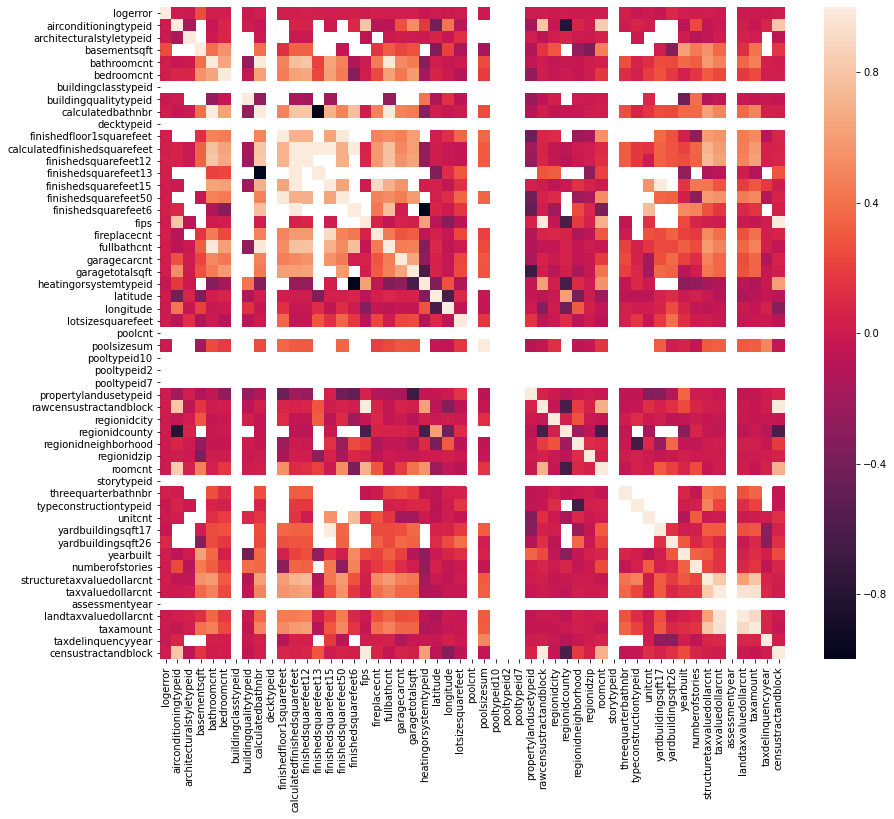

In [18]:
plt.figure(figsize = (14,12))
sns.heatmap(df[num_var].corr())

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [19]:
#corr().abs() 绝对值
#corr_matrix=df_train.corr().abs()
#corr_matrix

In [20]:
#drop strong correlation columns, treshhold=0.5
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [21]:
dropcols = []
dropcols.append('finishedsquarefeet12')
dropcols.append('finishedsquarefeet13')
dropcols.append('finishedsquarefeet15')
dropcols.append('finishedsquarefeet6')
dropcols.append('finishedsquarefeet50')
dropcols.append('calculatedbathnbr')
dropcols.append('fullbathcnt')

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [22]:
index=df.hashottuborspa.isna()

In [23]:
df.loc[index,"hashottuborspa"]='None'

In [24]:
#df.hashottuborspa.describe()

(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [25]:
df.loc[df.pooltypeid10.isna(),"pooltypeid10"]=0

In [26]:
index2=df.pooltypeid2.isna()
df.loc[index2,"pooltypeid2"]=0

In [27]:
index3=df.pooltypeid7.isna()
df.loc[index3,"pooltypeid7"]=0

In [28]:
index4=df.poolcnt.isna()
df.loc[index4,"poolcnt"]=0

(c) taxdelinquencyflag - assume if it is null then doesn't exist

In [29]:
index=df.taxdelinquencyflag.isna()
df.loc[index,"taxdelinquencyflag"]=0

(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [30]:
index=df.garagecarcnt.isna()
df.loc[index,"garagecarcnt"]=0

In [31]:
index=df.garagetotalsqft.isna()
df.loc[index,"garagetotalsqft"]=0

#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [32]:
poolsize_median = df.loc[df.poolcnt > 0, 'poolsizesum'].median()
df.loc[(df.poolcnt>0 & df.poolsizesum.isna()),'poolsizesum']=poolsize_median

In [33]:
poolsize_median

500.0

In [34]:
df.loc[df.poolcnt==0,'poolsizesum']=0

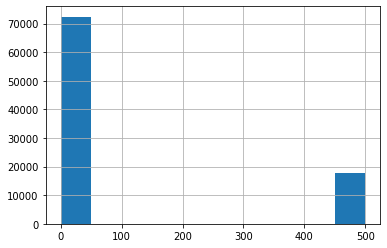

In [35]:
df.poolsizesum.hist()

#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [36]:
#instead of thinking 3 indexes, all apply to 'No' first, 取反.
df.fireplaceflag='No'

index3=df.query('fireplacecnt>0').index
df.loc[index3,'fireplaceflag']='Yes'

In [37]:
df.loc[df.fireplacecnt.isna(),'fireplaceflag']=0

#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [38]:
df.loc[df.airconditioningtypeid.isna(),'airconditioningtypeid']=1

(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [39]:
df.loc[df.heatingorsystemtypeid.isna(),'heatingorsystemtypeid']=2

#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [40]:
threshold=0.97
missing_prop=(df.isnull().sum()/len(df)).reset_index()
missing_prop.columns=['field','prop']
missing_prop

,field,prop
0,logerror,0.000000
1,airconditioningtypeid,0.000000
2,architecturalstyletypeid,0.997109
3,basementsqft,0.999524
4,bathroomcnt,0.000000
5,bedroomcnt,0.000000
6,buildingclasstypeid,0.999823
7,buildingqualitytypeid,0.364564
8,calculatedbathnbr,0.013093
9,decktypeid,0.992711


In [41]:
missing_prop=missing_prop.sort_values(by='prop',ascending=False)
missing_cols=missing_prop[missing_prop.prop>=threshold].field.tolist()
missing_cols

['buildingclasstypeid',
 'finishedsquarefeet13',
 'storytypeid',
 'basementsqft',
 'yardbuildingsqft26',
 'architecturalstyletypeid',
 'typeconstructiontypeid',
 'finishedsquarefeet6',
 'decktypeid',
 'taxdelinquencyyear',
 'yardbuildingsqft17']

In [42]:
dropcols=dropcols+missing_cols
df=df.drop(dropcols,axis=1, inplace=True)

In [43]:
#how to set threshold for correlation table?
# -> select/drop high correlation columns